In [41]:
import pandas as pd
df = pd.read_csv('income.csv')
df

,Age,Workclass,fnlwgt,Education,Education-num,marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [42]:
df.shape

(32561, 15)

In [43]:
df.drop(['fnlwgt','Education'],axis=1,inplace=True)

In [44]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [45]:
df.columns

Index(['Age', 'Workclass', 'Education-num', 'marital-status', 'Occupation',
       'Relationship', 'Race', 'Gender', 'Capital-gain', 'Capital-loss',
       'Hours-per-week', 'Country', 'Income'],
      dtype='object')

In [46]:
import numpy as np
df.replace(' ?',np.nan,inplace=True) 

In [47]:
df.isna().sum()

Age                  0
Workclass         1836
Education-num        0
marital-status       0
Occupation        1843
Relationship         0
Race                 0
Gender               0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Country            583
Income               0
dtype: int64

In [48]:
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Country'].fillna(df['Country'].mode()[0],inplace=True)

In [49]:
df.describe()

,Age,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [50]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [51]:
Y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32561, dtype: object

In [52]:
X.columns

Index(['Age', 'Workclass', 'Education-num', 'marital-status', 'Occupation',
       'Relationship', 'Race', 'Gender', 'Capital-gain', 'Capital-loss',
       'Hours-per-week', 'Country'],
      dtype='object')

In [53]:
Y = pd.get_dummies(Y,columns=['Income'],drop_first=True)
X = pd.get_dummies(X,columns=['Workclass','marital-status','Occupation','Relationship','Race','Gender','Country'],drop_first=True)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

GR = GradientBoostingClassifier()
GR.fit(X_train,Y_train)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [57]:
GR.decision_function(X_test)

array([-2.92471126, -3.14377142,  0.32817896, ...,  2.44310763,
       -4.47617549, -3.61407826])

In [58]:
#ROC curve and Area-Under-Curve (AUC)
from sklearn.metrics import roc_curve, auc
roc = roc_curve(Y_test, GR.decision_function(X_test))
res = auc(roc[0], roc[1])

<AxesSubplot:>

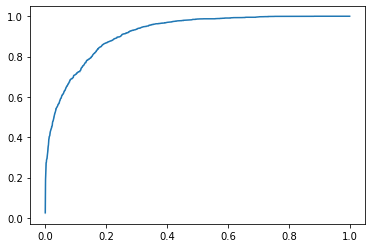

In [59]:
import seaborn as sns
sns.lineplot(x=roc[0], y=roc[1])

In [60]:
Y_pred = GR.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
print(f"{confusion_matrix(Y_test,Y_pred)}")

[[4671  257]
 [ 643  942]]


In [62]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
accuracy_score(Y_test,Y_pred)

0.8618148318747121

In [63]:

result =[]
for lr in [0.05, 0.1, 0.25, 0.5, 0.75, 1]:
    GR = GradientBoostingClassifier(learning_rate=lr)
    GR.fit(X_train,Y_train)
    Y_ped = GR.predict(X_test)
    pr,re,fs,sp = precision_recall_fscore_support(Y_test,Y_pred)
    probs = GR.decision_function(X_test)
    # fpr, tpr, thresholds = roc_curve(Y_test,probs )
    # print(roc)
    result_local = {   
    'learning_rate': lr,
    'roc'  :roc_curve(Y_test,probs ),
    'auc' : roc_auc_score(Y_test, probs) ,
    'confusion_matrix' : confusion_matrix(Y_test,Y_pred),
    'accuracy_score' : accuracy_score(Y_test,Y_pred),
    'precision':pr,
    'recall':re,
    'fscore':fs,
    'support':sp
     }
    result.append(result_local)

    

    
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataC

In [64]:
ressult_df = pd.DataFrame(result)
ressult_df

,learning_rate,roc,auc,confusion_matrix,accuracy_score,precision,recall,fscore,support
0,0.05,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.910817,"[[4671, 257], [643, 942]]",0.861815,"[0.878998870907038, 0.7856547122602169]","[0.947849025974026, 0.5943217665615141]","[0.9121265377855888, 0.6767241379310345]","[4928, 1585]"
1,0.10,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.917203,"[[4671, 257], [643, 942]]",0.861815,"[0.878998870907038, 0.7856547122602169]","[0.947849025974026, 0.5943217665615141]","[0.9121265377855888, 0.6767241379310345]","[4928, 1585]"
2,0.25,"([0.0, 0.00020292207792207794, 0.0006087662337...",0.920347,"[[4671, 257], [643, 942]]",0.861815,"[0.878998870907038, 0.7856547122602169]","[0.947849025974026, 0.5943217665615141]","[0.9121265377855888, 0.6767241379310345]","[4928, 1585]"
3,0.50,"([0.0, 0.00020292207792207794, 0.0002029220779...",0.917935,"[[4671, 257], [643, 942]]",0.861815,"[0.878998870907038, 0.7856547122602169]","[0.947849025974026, 0.5943217665615141]","[0.9121265377855888, 0.6767241379310345]","[4928, 1585]"
4,0.75,"([0.0, 0.00020292207792207794, 0.0004058441558...",0.918986,"[[4671, 257], [643, 942]]",0.861815,"[0.878998870907038, 0.7856547122602169]","[0.947849025974026, 0.5943217665615141]","[0.9121265377855888, 0.6767241379310345]","[4928, 1585]"
5,1.00,"([0.0, 0.00020292207792207794, 0.0006087662337...",0.916114,"[[4671, 257], [643, 942]]",0.861815,"[0.878998870907038, 0.7856547122602169]","[0.947849025974026, 0.5943217665615141]","[0.9121265377855888, 0.6767241379310345]","[4928, 1585]"


<AxesSubplot:xlabel='learning_rate', ylabel='auc'>

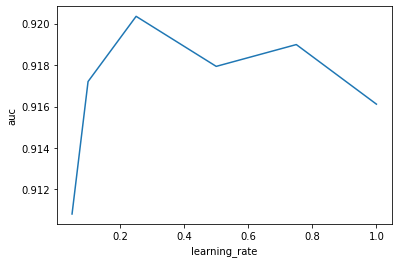

In [65]:
sns.lineplot(x=ressult_df['learning_rate'], y=ressult_df['auc'])